##### List of Classification Models
* Decision Tree (Gini, Entropy)
* K Nearnest Neighbors
* Logistic Regression
* Naive Bayesian

- - -

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##### 1. Import Required Libraries

In [2]:
import sklearn.tree
import sklearn.svm
import sklearn.ensemble
import sklearn.neighbors
import sklearn.linear_model
import sklearn.gaussian_process
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection
import warnings
warnings.filterwarnings("ignore")

In [3]:
### LIB TO OPEN EXCEL FILE
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import joblib

##### 2. Load Dataset

In [4]:
import numpy as np
# data_type = 'all_pids_q=0.2'
# ROOT_DIR = '/content/gdrive/MyDrive/REU2022/Classification/'
# output_dir = ROOT_DIR + "classification_results/"
# data_dir = '/content/gdrive/MyDrive/REU2022/Classification/'

#@markdown Upload your data set to the data folder and set file_name to the dataset file name
file_name = 'small_synthetic_dataset.csv' #@param {type:"string"}
ROOT_DIR = '/content/gdrive/MyDrive/REU2022/Classification/'
output_dir = ROOT_DIR + "classification_results/"
data_dir = '/content/gdrive/MyDrive/REU2022/data/'
df = pd.read_csv(data_dir + file_name) 

print(file_name, "shape:", df.shape, end="\t\t")
display(df)


small_synthetic_dataset.csv shape: (200, 4)		

,Unnamed: 0,x1,x2,class
0,0,0.854691,0.793230,1
1,1,0.848764,0.903198,1
2,2,0.472931,0.371438,1
3,3,0.300646,0.803556,1
4,4,0.872885,0.843421,1
...,...,...,...,...
195,195,0.115072,0.009564,0
196,196,0.485201,0.182625,0
197,197,0.474144,0.215104,0
198,198,0.062675,0.274210,0


##### 3. Clean Data for Classification (change DROP_ATTRIBUTES list)

In [5]:
df.keys()
# Drop unnecesarry columns from dataset (change list as needed)
DROP_ATTRIBUTES = ["Unnamed: 0"]
df.drop(DROP_ATTRIBUTES, axis=1, inplace=True)
print(file_name, "shape:", df.shape, end="\t\t")
display(df)

small_synthetic_dataset.csv shape: (200, 3)		

,x1,x2,class
0,0.854691,0.793230,1
1,0.848764,0.903198,1
2,0.472931,0.371438,1
3,0.300646,0.803556,1
4,0.872885,0.843421,1
...,...,...,...
195,0.115072,0.009564,0
196,0.485201,0.182625,0
197,0.474144,0.215104,0
198,0.062675,0.274210,0


##### 4. Import Classification Function

In [6]:
import importlib.util
spec = importlib.util.spec_from_file_location('classification', ROOT_DIR + 'Classificationv3.py')
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)

##### 5. Set Classification Models

In [7]:
predictColumn = "class"
minorityVariable = 0 # must be an integer

y = df[predictColumn]
class_names = y.unique()
class_names[::-1].sort()
n_classes = len(class_names)
if n_classes > 2 :
    logit_reg_model = sklearn.linear_model.LogisticRegression(solver='saga', multi_class='multinomial')
else :
    logit_reg_model = sklearn.linear_model.LogisticRegression(solver='liblinear', multi_class='auto')
        
cls = [ "DecisionTree" , sklearn.tree.DecisionTreeClassifier(max_depth=4),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Logit Regression"  , logit_reg_model,
        "Naive Bayes"       , sklearn.gaussian_process.GaussianProcessClassifier()
];

from sklearn.preprocessing import StandardScaler
kf = sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=26)
y_pred = y.copy()
l = sklearn.preprocessing.LabelEncoder()
encoded_y = l.fit_transform(y);
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(type(scaled_X))
new_df = pd.DataFrame(scaled_X)
new_df = new_df.assign(label = list(encoded_y))
print(new_df)
balanced_new_df = wade.BalanceClassesWithDuplicates(new_df, 'label')
asdf_y = 

##### 6. classify the data and save the results

In [8]:
EVALUATION_METRICS = ['Weighted Accuracy', 'Sensitivity/Recall', 'Precision_avg', 'F1_avg', 'Specificity', 'Precision', 'Precision_class1', 'F1', 'F1_class1']


In [9]:
def classify(file_name, predictCol, minorVar, category_group, cls, output_dir, df_evaluation_results):
    #runtime()

    if len(cls)!=2:
      print('process one model each time')
      return
  
    print('~~~~~~~~~~~~~~~~~', file_name,'~~~~~~~~~~~~~~~~~~~~~~')

    dataset_dir = Path(output_dir + category_group + "/diagrams/" + file_name + '/') #RESULT_DIR

    # Create Directory for this patient
    if not (dataset_dir.exists() and dataset_dir.is_dir()):
        dataset_dir.mkdir()    

    print(dataset_dir)

    save_path = output_dir + category_group +'/diagrams/' + file_name + '/sklearn_models_balanced_for_train_'
    print(save_path)

    CLASS_VAR = predictCol
    MINORITY_VAR = minorVar

    bestDT = module.Classify(df, True, class_var=CLASS_VAR, minority_var=MINORITY_VAR, drawConfusionMatrix=True, classifiers=cls, scale=True, save_path=save_path, after_split=True)

    confusion_matrixes_file = save_path + "confusion_mat_" + category_group + "_"+ file_name
    module.save_confusion_matrix(bestDT[1], confusion_matrixes_file)
    roc_curve_file = save_path + "roc_curve_" + category_group + "_"+ file_name
    module.save_Draw_Roc(bestDT[2], roc_curve_file)
    if len(bestDT[3])!=0:
      featureImportance_path = save_path + "important_mat_" + category_group + "_"+ file_name
      module.save_Draw_FeatureImportanceMatrix(df,bestDT[3],cls[0], featureImportance_path, True)
      
    model_path = save_path + "bestModel_" + category_group + "_"+ file_name + ".joblib"
    joblib.dump(bestDT[4], model_path)
    loaded_model = joblib.load(model_path)
    print(loaded_model) 

    df_evaluation_results[file_name] = bestDT[0]
    df_evaluation_results.to_csv(output_dir+category_group+"/sklearn_models_balanced_for_train_metrics_"+category_group + ".csv")
    

### 1. Tuning DecisionTree

~~~~~~~~~~~~~~~~~ small_synthetic_dataset.csv ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/REU2022/Classification/classification_results/1DecisionTree/diagrams/small_synthetic_dataset.csv
/content/gdrive/MyDrive/REU2022/Classification/classification_results/1DecisionTree/diagrams/small_synthetic_dataset.csv/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  212  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  214  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  134  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  214  ~~~~~~~~~~
~~~~~~~~~~ DecisionTree ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------
----DecisionTree kfold---------- 0.9673311184939092 DecisionTreeClassifier(criterion='entropy', max_depth=15)
There is Feature Importance matrix for this classifier: Decision

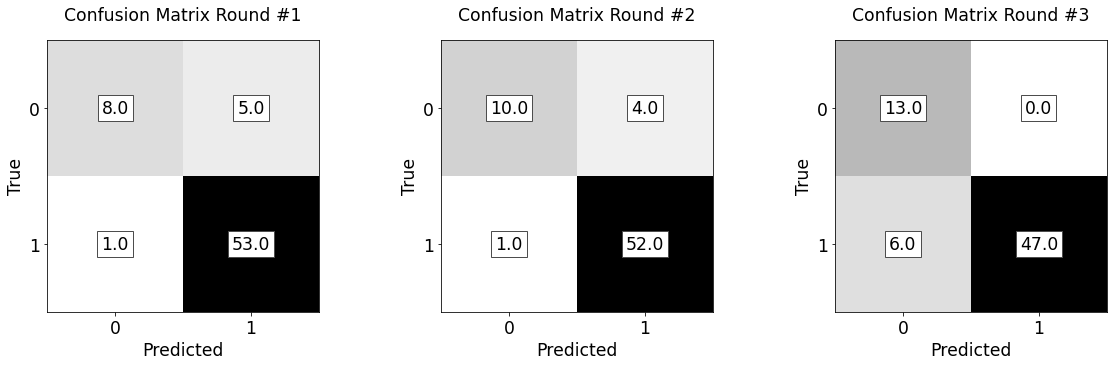

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


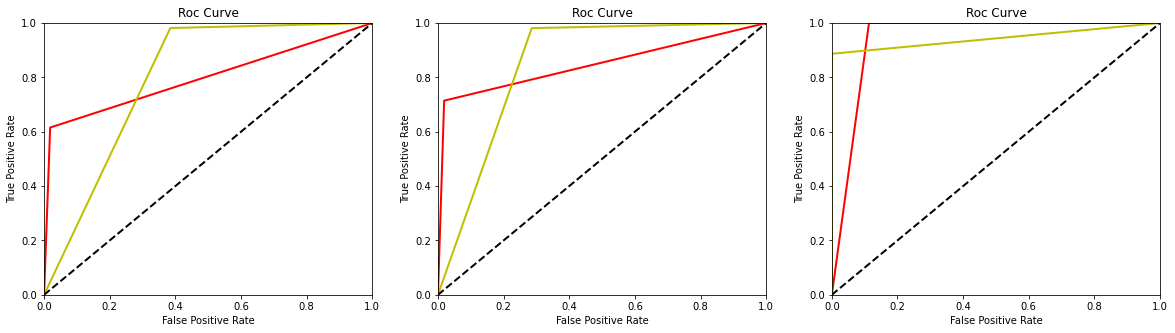

(((((((( draw droc end ))))))))
---------------DrawFeatureImportanceMatrix------------


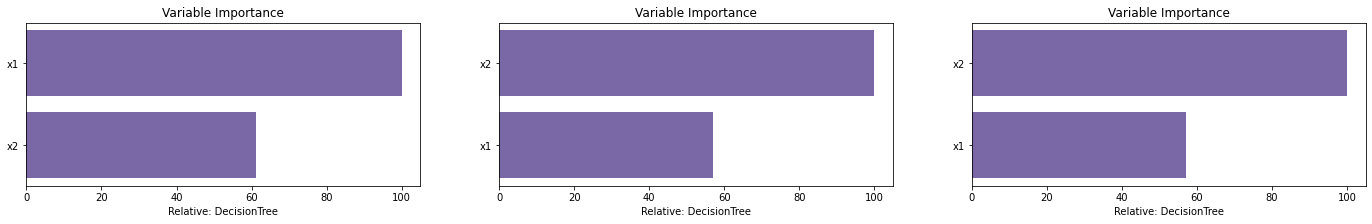

------------DrawFeatureImportanceMatrix end----------------
DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [10]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = '1DecisionTree'
cls = ["DecisionTree", sklearn.tree.DecisionTreeClassifier(max_depth=4)]
classify(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)

### 2. K-NN

~~~~~~~~~~~~~~~~~ small_synthetic_dataset.csv ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/REU2022/Classification/classification_results/2K-NN/diagrams/small_synthetic_dataset.csv
/content/gdrive/MyDrive/REU2022/Classification/classification_results/2K-NN/diagrams/small_synthetic_dataset.csv/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  212  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  224  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  134  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  204  ~~~~~~~~~~
~~~~~~~~~~ K-NN ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------
---K-NN--- 0.9623477297895903 KNeighborsClassifier(metric='manhattan', n_neighbors=3)
----- [0.88603989 0.84615385 0.8474359  0.86455526 0.92592593 0.73333333
 0.96153846 0.78571429 0.94339623] [[11

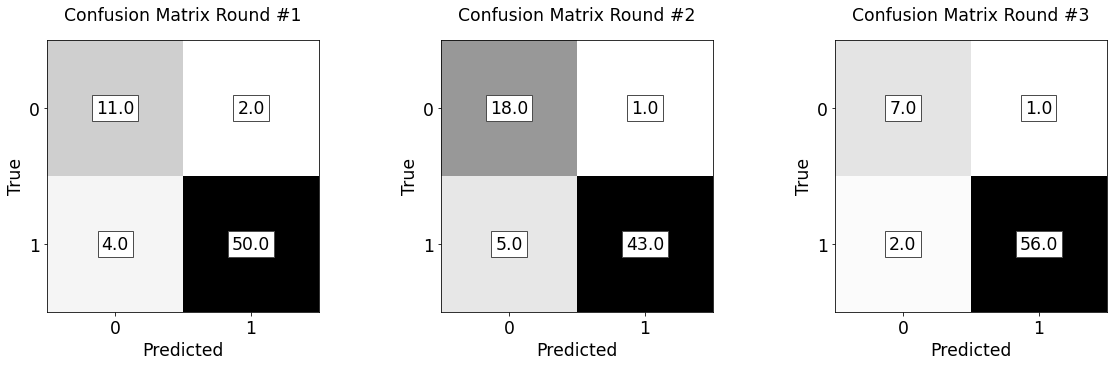

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


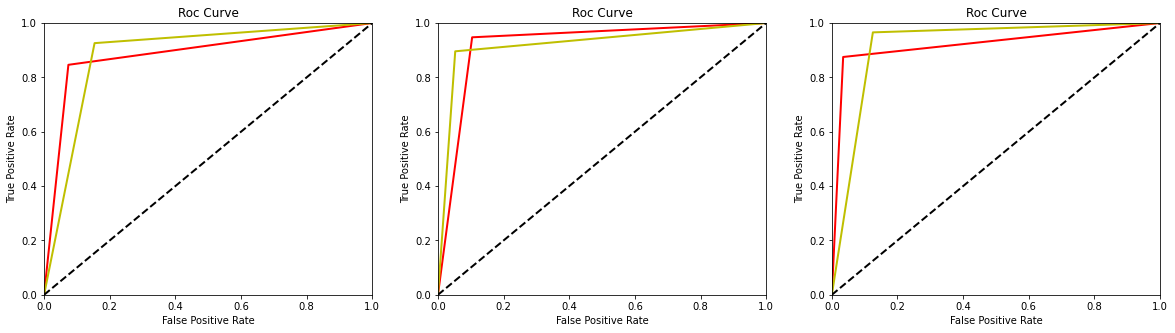

(((((((( draw droc end ))))))))
KNeighborsClassifier(metric='euclidean', weights='distance')


In [11]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = '2K-NN'
cls = ["K-NN", sklearn.neighbors.KNeighborsClassifier()]
classify(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)

### 3. Logistic Regression

~~~~~~~~~~~~~~~~~ small_synthetic_dataset.csv ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/REU2022/Classification/classification_results/3LogisticRegression/diagrams/small_synthetic_dataset.csv
/content/gdrive/MyDrive/REU2022/Classification/classification_results/3LogisticRegression/diagrams/small_synthetic_dataset.csv/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  214  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  216  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  134  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  210  ~~~~~~~~~~
~~~~~~~~~~ Logit Regression ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------
---Logit Regression--- 0.9672203765227021 LogisticRegression(C=1, solver='liblinear')
----- [0.90768194 0.92857143 0.8316886  0.85928593 0.88679245 0.68421053

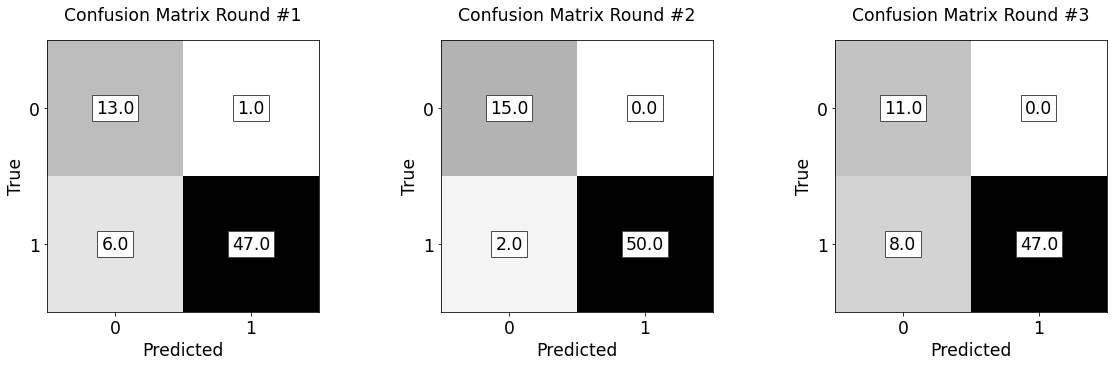

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


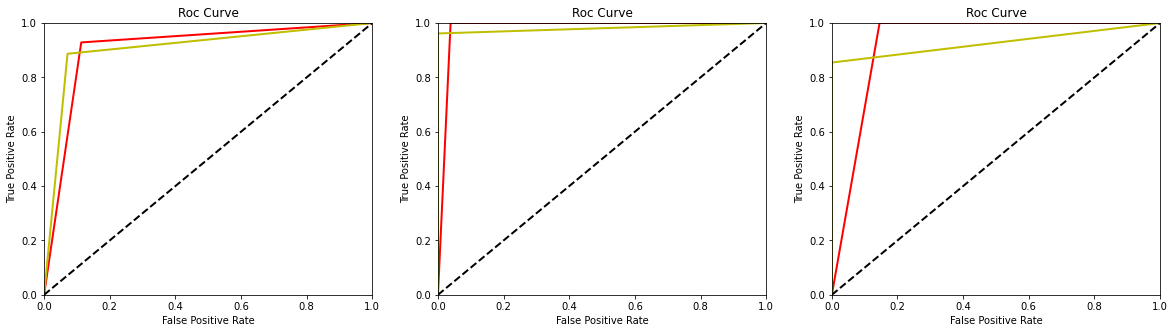

(((((((( draw droc end ))))))))
LogisticRegression(C=1, solver='liblinear')


In [12]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = '3LogisticRegression'
cls = ["Logit Regression", logit_reg_model]
classify(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)

### 4. Naive Bayes

~~~~~~~~~~~~~~~~~ small_synthetic_dataset.csv ~~~~~~~~~~~~~~~~~~~~~~
/content/gdrive/MyDrive/REU2022/Classification/classification_results/4NaiveBayes/diagrams/small_synthetic_dataset.csv
/content/gdrive/MyDrive/REU2022/Classification/classification_results/4NaiveBayes/diagrams/small_synthetic_dataset.csv/sklearn_models_balanced_for_train_
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  216  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  133  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  210  ~~~~~~~~~~
~~~~~~~~~~ Number of instances before balancing:  134  ~~~~~~~~~~
~~~~~~~~~~ Number of instances after balancing:  214  ~~~~~~~~~~
~~~~~~~~~~ Naive Bayes ~~~~~~~~~~~~~~~
-----------kfold--------------- 0 ------------
---Naive Bayes--- 0.9306553911205073 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)
----- [0.96153846 1.         0.89473684 0.92117647 0.92307692 0.

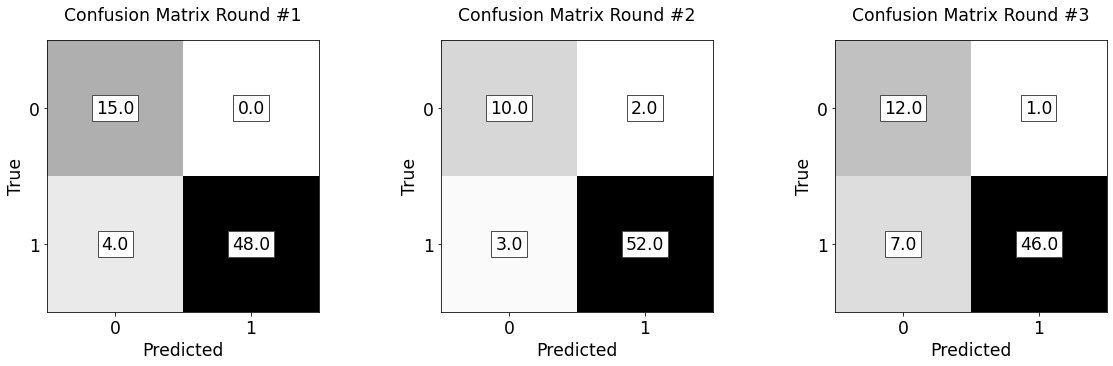

++++++++++++save_confusion_matrix end++++++++++++
(((((((((((((((((((((( draw droc ))))))))))))))))))))))))))))))


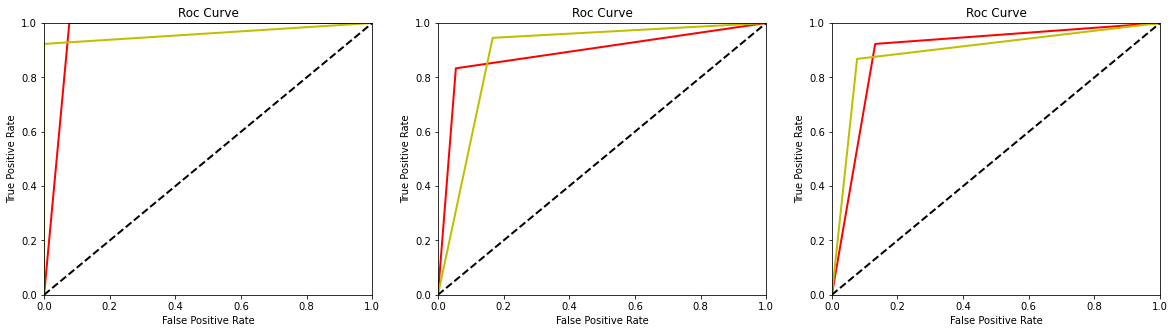

(((((((( draw droc end ))))))))
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)


In [13]:
df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)
category_group = '4NaiveBayes'
cls = ["Naive Bayes", sklearn.gaussian_process.GaussianProcessClassifier()]
classify(file_name, predictColumn, minorityVariable, category_group, cls, output_dir, df_evaluation_results)